# Phylogenetic Tree Analysis

## What is phylogenetic tree?
Phylogenetics is the study of the evolutionary history and relationships among individuals or groups of organisms

## Key points
- A phylogenetic tree is a diagram that represents evolutionary relationships among organisms. Phylogenetic trees are hypotheses, not definitive facts
- The pattern of branching in a phylogenetic tree reflects how species or other groups evolved from a series   of common ancestors.
- In trees, two species are more related if they have a more recent common ancestor and less related if they have a less recent common ancestor.
- Phylogenetic trees can be drawn in various equivalent styles. Rotating a tree about its branch points doesn't change the information it carries.

## Types of phylogenetic tree
- Rooted : Rooted tree directed to a unique node.
- Unrooted : Unrooted tree shows the relatedness of the leaves
  without assuming ancestry at all 

## Anatomy of a tree
- Root: origin of evolution
- Leaves: current organisms, species, or genomic
  sequence 
- Branches: relationship between organisms, species,
    or genomic sequence 
- Branch length: evolutionary time 
![Phylo](../img/anatomy.png)

## Most recent common ancestor
![Phylo](../img/common.png)

## Which species are more related?
![Phylo](../img/ancestors.png)

## Steps of constructing phylogenetic tree
- Step 1: Acquiring the Sequences
    - DNA Sequences
    - Protein Sequences
- Step 2: Multiple sequence alignment
    - MEGA
    - ClustalW
- Step 3: Model/Algorithms selection
    - UPGAMA
    - NJ
- Step 4: Phylogenetic tree construction
    - Distance based methods
    - Probabilistic methods
    - Maximum Parsimony (MP) methods
- Step 5: Evaluation/Analysis of tree
    - Statistical analysis

# Implementation in Python

## DistanceTreeConstructor
- The DistanceTreeConstructor has two algorithms:
    - UPGMA (Unweighted Pair Group Method with Arithmetic Mean)
    - NJ (Neighbor Joining)
- Both algorithms construct trees based on a distance matrix. 
- So before using these algorithms, you have to calculate distance matrix from a multiple sequence alignment object by using **DistanceCalculator**

In [5]:
# Essential imports 
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO
import seaborn as sns 
sns.set_style('whitegrid')

In [2]:
# Read sequence(MSA)
seq = AlignIO.read("../data/msa.phy", "phylip")
print(seq)

Alignment with 5 rows and 13 columns
AACGTGGCCACAT Alpha
AAGGTCGCCACAC Beta
CAGTTCGCCACAA Gamma
GAGATTTCCGCCT Delta
GAGATCTCCGCCC Epsilon


## Distance Matrix Calculation

In [3]:
# Calculate distance matrix 
cal = DistanceCalculator('identity')
dm = cal.get_distance(seq)
print(dm)

Alpha	0
Beta	0.23076923076923073	0
Gamma	0.3846153846153846	0.23076923076923073	0
Delta	0.5384615384615384	0.5384615384615384	0.5384615384615384	0
Epsilon	0.6153846153846154	0.3846153846153846	0.46153846153846156	0.15384615384615385	0
	Alpha	Beta	Gamma	Delta	Epsilon


## Tree Construction: UPGMA 

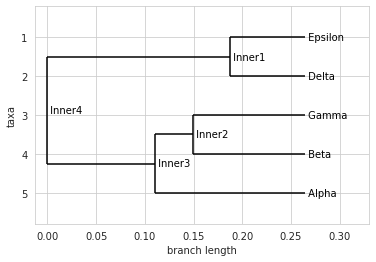

In [6]:
tree_constructor = DistanceTreeConstructor()
tree = tree_constructor.upgma(dm)
Phylo.draw(tree)
# Phylo.draw_ascii(tree)

In [8]:
# ASCII  format 
Phylo.draw_ascii(tree)

                                                  ____________________ Epsilon
  _______________________________________________|
 |                                               |____________________ Delta
_|
 |                                      ______________________________ Gamma
 |                            _________|
 |___________________________|         |______________________________ Beta
                             |
                             |________________________________________ Alpha



## Tree Construction: NJ

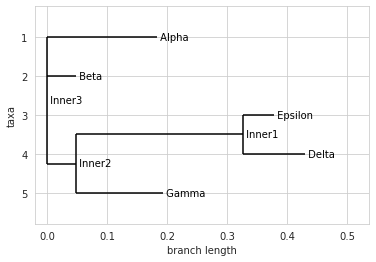

In [9]:
tree_constructor = DistanceTreeConstructor()
tree = tree_constructor.nj(dm)
Phylo.draw(tree)

In [10]:
Phylo.draw_ascii(tree)

  ____________________________ Alpha
 |
 |______ Beta
_|
 |                                                    _______ Epsilon
 |       ____________________________________________|
 |______|                                            |________________ Delta
        |
        |______________________ Gamma



## References 
- https://www.khanacademy.org/science/high-school-biology/hs-evolution/hs-phylogeny/a/phylogenetic-trees
- https://biopython.org/wiki/Phylo
- https://www.pellegrini.mcdb.ucla.edu/wp-content/uploads/sites/21/2017/07/week-3c-Phylogenetic_Tree_ConstructionMai-copy.pdf
- https://academic.oup.com/mbe/article/30/5/1229/992850